# Processamento de Imagens Digitais 
## Dept. de Estatística, Mat. Aplicada e Computação (DEMAC)
#### Prof. Dr. Daniel Carlos Guimarães Pedronette

Relatório da lista de exercícios N° 5
-------------------------------
**Nome:** Álvaro Leandro Cavalcante Carneiro 


**Linguagem utilizada:** Python 3.6



## Importando as bibliotecas 
Importando as bibliotecas que serão utilizadas para desenvolver as atividades.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

## Carregamento das imagens
As imagens utilizadas no exercício para as operações morfológicas serão da base de dados MPEG-7, conforme sugerido. Os valores serão normalizados entre 0 e 1. A convenção do conjunto de imagens é utilizar o valor 1 para o objeto de interesse (branco) e 0 para o background (preto).

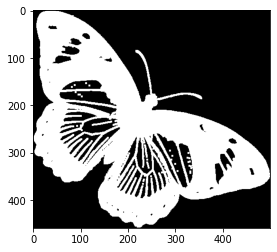

In [162]:
img = np.array(Image.open('/home/alvaro/Downloads/original/butterfly-1.gif'))
img = np.where(img==255, 1, img)
plt.imshow(img, cmap='gray') 

## Aplicando as operações morfológicas
O primeiro passo para aplicação das operações morfológicas é capturar o conjunto de pixels que possui algum valor, uma vez que esse conjunto será utilizado nas operações futuras. Para isso, foi criado o método *map_coordinates*.

In [5]:
def map_coordinates(img):
    coords = []
    for col in range(img.shape[0]):
        for line in range(img.shape[1]):    
            if img[col][line] == 1:
                coords.append((col, line)) 
    
    return coords

In [163]:
coords = map_coordinates(img)
print(coords)

[(1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 47), (2, 25), (2, 26), (2, 27), (2, 28), (2, 29), (2, 30), (2, 31), (2, 32), (2, 33), (2, 34), (2, 35), (2, 36), (2, 37), (2, 38), (2, 39), (2, 40), (2, 41), (2, 42), (2, 43), (2, 44), (2, 45), (2, 46), (2, 47), (2, 48), (2, 49), (2, 50), (2, 51), (2, 52), (2, 53), (2, 54), (3, 21), (3, 22), (3, 23), (3, 24), (3, 25), (3, 26), (3, 27), (3, 28), (3, 29), (3, 30), (3, 31), (3, 32), (3, 33), (3, 34), (3, 35), (3, 36), (3, 37), (3, 38), (3, 39), (3, 40), (3, 41), (3, 42), (3, 43), (3, 44), (3, 45), (3, 46), (3, 47), (3, 48), (3, 49), (3, 50), (3, 51), (3, 52), (3, 53), (3, 54), (3, 55), (3, 56), (3, 57), (3, 58), (4, 19), (4, 20), (4, 21), (4, 22), (4, 23), (4, 24), (4, 25), (4, 26), (4, 27), (4, 28), (4, 29), (4, 30), (4, 31), (4, 32), (4, 33), (4, 34), (4, 35), (4, 36), (4, 37), (4, 38), (4, 39), (4, 40), (4, 41), 

O resultado é uma lista de tuplas contendo as coordenadas (linhas e colunas) dos objetos de interesse (aqueles com valor 1).


O método *get_kernel* foi utilizado para criar um elemento estruturante com o tamanho especificado, que será utilizado na aplicação das operações morfológicas.

In [6]:
def get_kernel(width, heigth):
    kernel = []
    for h in range(heigth):
        for w in range(width):
            kernel.append((h,w))
            
    return np.array(kernel)

In [8]:
kernel_element = get_kernel(11,11)
print(kernel_element) # o kernel não é uma matriz em si, mas um conjunto de coordenadas

[[ 0  0]
 [ 0  1]
 [ 0  2]
 [ 0  3]
 [ 0  4]
 [ 0  5]
 [ 0  6]
 [ 0  7]
 [ 0  8]
 [ 0  9]
 [ 0 10]
 [ 1  0]
 [ 1  1]
 [ 1  2]
 [ 1  3]
 [ 1  4]
 [ 1  5]
 [ 1  6]
 [ 1  7]
 [ 1  8]
 [ 1  9]
 [ 1 10]
 [ 2  0]
 [ 2  1]
 [ 2  2]
 [ 2  3]
 [ 2  4]
 [ 2  5]
 [ 2  6]
 [ 2  7]
 [ 2  8]
 [ 2  9]
 [ 2 10]
 [ 3  0]
 [ 3  1]
 [ 3  2]
 [ 3  3]
 [ 3  4]
 [ 3  5]
 [ 3  6]
 [ 3  7]
 [ 3  8]
 [ 3  9]
 [ 3 10]
 [ 4  0]
 [ 4  1]
 [ 4  2]
 [ 4  3]
 [ 4  4]
 [ 4  5]
 [ 4  6]
 [ 4  7]
 [ 4  8]
 [ 4  9]
 [ 4 10]
 [ 5  0]
 [ 5  1]
 [ 5  2]
 [ 5  3]
 [ 5  4]
 [ 5  5]
 [ 5  6]
 [ 5  7]
 [ 5  8]
 [ 5  9]
 [ 5 10]
 [ 6  0]
 [ 6  1]
 [ 6  2]
 [ 6  3]
 [ 6  4]
 [ 6  5]
 [ 6  6]
 [ 6  7]
 [ 6  8]
 [ 6  9]
 [ 6 10]
 [ 7  0]
 [ 7  1]
 [ 7  2]
 [ 7  3]
 [ 7  4]
 [ 7  5]
 [ 7  6]
 [ 7  7]
 [ 7  8]
 [ 7  9]
 [ 7 10]
 [ 8  0]
 [ 8  1]
 [ 8  2]
 [ 8  3]
 [ 8  4]
 [ 8  5]
 [ 8  6]
 [ 8  7]
 [ 8  8]
 [ 8  9]
 [ 8 10]
 [ 9  0]
 [ 9  1]
 [ 9  2]
 [ 9  3]
 [ 9  4]
 [ 9  5]
 [ 9  6]
 [ 9  7]
 [ 9  8]
 [ 9  9]
 [ 9 10]
 [10  0]
 

## Dilatação e erosão
O método *dilate_img* aplica a dilatação na imagem, percorrendo cada um dos pontos das coodenadas e aplicando o elemento estruturante a esses pontos para verificar se o pixels será ou não preenchido.

In [8]:
def dilate_img(coords, img):
    dilated_img = img.copy()
    for coord in coords:
        for element in kernel_element:
            # verifica os limites da imagem para evitar erros
            if coord[0] + element[0] < img.shape[0] and coord[1] + element[1] < img.shape[1]:
                # verifica se é um valor a ser preenchido (valor 0)
                if img[coord[0] + element[0]][coord[1] + element[1]] != 1:
                    dilated_img[coord[0] + element[0]][coord[1] + element[1]] = 1    

    return dilated_img

In [7]:
def show_img(transformed_img, original_img): # método para plotar imagens lado a lado.
    figure, axarr = plt.subplots(1,2, figsize=(10, 10))
    axarr[0].imshow(transformed_img, cmap='gray')
    axarr[1].imshow(original_img, cmap='gray')

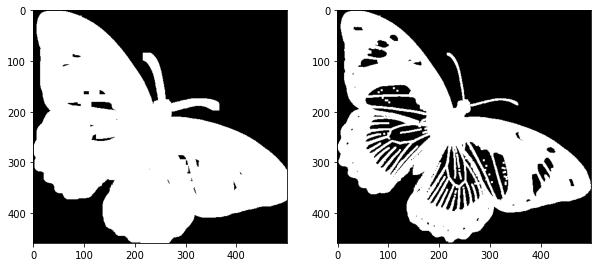

In [43]:
dilated_img = dilate_img(coords, img)
show_img(dilated_img, img)

Como esperado, o resultado obtido é um preenchimento das lacunas presentes na asa da borboleta, uma vez que o elemento estruturante dilata as estruturas do conjunto da imagem. O mesmo resultado pode se observado ao utilizar o método de dilatação nativo da biblioteca *OpenCV*, comprovando a validade do que foi criado.

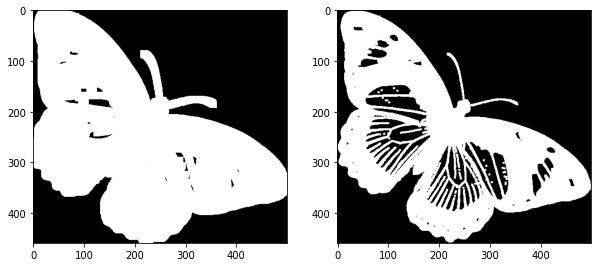

In [35]:
kernel = np.ones((11,11),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)
show_img(dilation, img)

A vantagem se dá apenas na eficiência computacional da execução da biblioteca do Python, embora esse aspecto possa ser ignorado nesse trabalho.

O próximo método criado foi o *erode_img* que faz a erosão das imagens, assim como o nome sugere. A lógica é muito parecida com a dilatação, porém aqui os valores são zerados ao invés de adicionados.

In [9]:
def erode_img(coords, img):
    eroded_img = img.copy()
    for coord in coords:
        for element in kernel_element:
            if coord[0] + element[0] < img.shape[0] and coord[1] + element[1] < img.shape[1]:
                if img[coord[0] + element[0]][coord[1] + element[1]] != 1:
                    eroded_img[coord[0]][coord[1]] = 0    
                    break
                
    return eroded_img

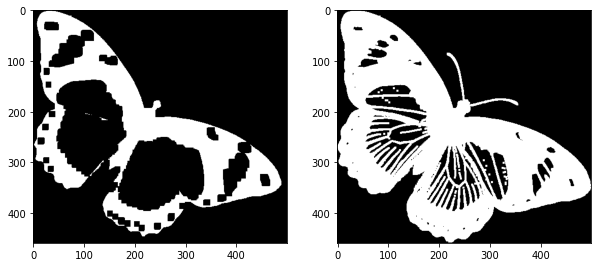

In [45]:
eroded_img = erode_img(coords, img)
show_img(eroded_img, img)

Um resultado inverso a dilatação é obtido, aumentando as lacunas presentes nas asas da borboleta. Interessante notar como até as suas antenas foram eliminadas na aplicação desse elemento estruturante em específico. Novamente, os resultados são reproduzidos no *OpenCV*.

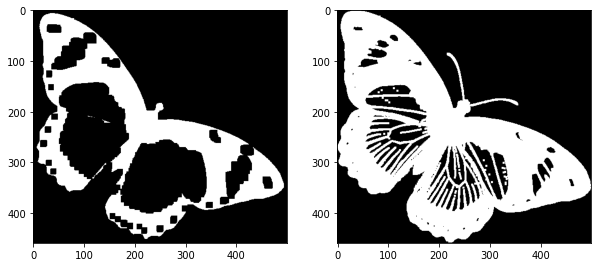

In [41]:
erosion = cv2.erode(img,kernel,iterations = 1)
show_img(erosion, img)

O tamanho do elemento estruturante é um importante parâmetro a ser escolhido. Ao aumentar o tamanho entre 11x11 para 15x15 é possível um afinamento e aumento nas lacunas da imagem.

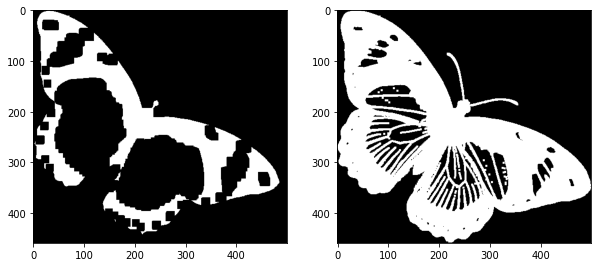

In [164]:
kernel_element = get_kernel(15,15)
eroded_img = erode_img(coords, img)
show_img(eroded_img, img)

## Abertura e fechamento
Os próximos dois métodos criados são o de abertura e fechamento, aplicando nada mais que uma erosão seguida de dilatação e uma dilatação seguida de erosão, respectivamente. 

In [10]:
def openning_img(coords, img):
    eroded = erode_img(coords, img)
    coords = map_coordinates(eroded)

    opened = dilate_img(coords, eroded)
    return opened

def closing_img(coords, img):
    dilated = dilate_img(coords, img)
    coords = map_coordinates(dilated)
    closed = erode_img(coords, dilated)

    return closed

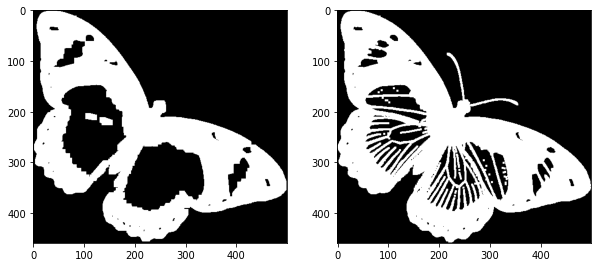

In [48]:
open_img = openning_img(coords, img)
show_img(open_img, img)

É interessante notar como os resultados são levemente diferentes da imagem erodida, pois aqui, existe uma aplicação posterior da dilatação, reduzindo algumas lacunas abertas na imagem em pontos mais isolados, como a série de quadrados pretos na parte inferior da asa. Os resultados também são idêntidos no *OpenCV*, porém vou deixar de mostrar visualmente.

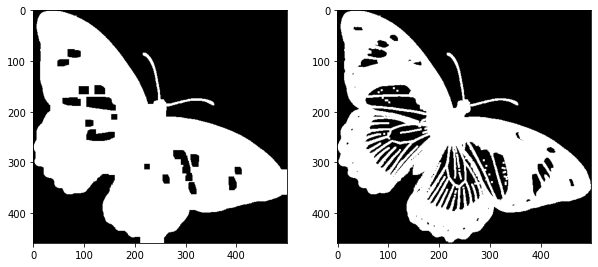

In [49]:
close_img = closing_img(coords, img)
show_img(close_img, img)

O preenchimento gerado pelo fechamento também é interessante, preservando algumas lacunas presentes na imagem original.

## Detecção de bordas e esqueletos
Uma vez criado os métodos de erosão e dilatação, a extração de bordas se torna um processo simplificado, bastando subtrair a imagem original pela sua versão erodida. Para isso, foi criado o método *border_extraction*.

In [11]:
def border_extraction(coords, img):
    eroded = erode_img(coords, img)
    border = img - eroded
    return border

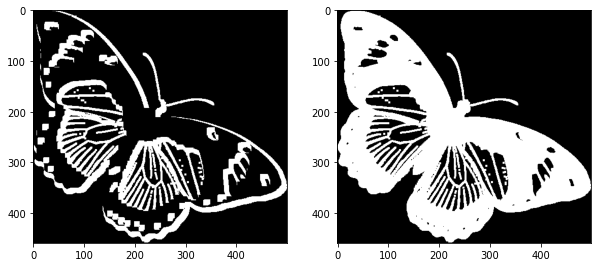

In [52]:
border = border_extraction(coords, img)
show_img(border, img)

A imagem resultado evidencia a eficiência desse método para extração de bordas das imagens binários, preservando até mesmo os detalhes finos.

A obtenção do esqueleto, por outro lado, não é tão simples. É necessário fazer diversas iterações pela imagem, gerando operações de abertura, subtração e erosão. Os resultados sucessivas dessas operações são unidos para gerar o esqueleto da imagem.

In [12]:
def get_skeleton(coords, img):
    skel = np.zeros(img.shape, np.uint8) # inicia uma imagem vazia para ser o esqueleto
    n=0

    while n < 80: # número de iterações impiricamente encontrado
        opened = openning_img(coords, img)
        result = img - opened
        eroded = erode_img(coords, img)
        
        skel = cv2.bitwise_or(skel,result) # faz a união dos resultados obtidos ao esqueleto resultante
        img = eroded.copy()
        coords = map_coordinates(img)
        n+=1

    return skel

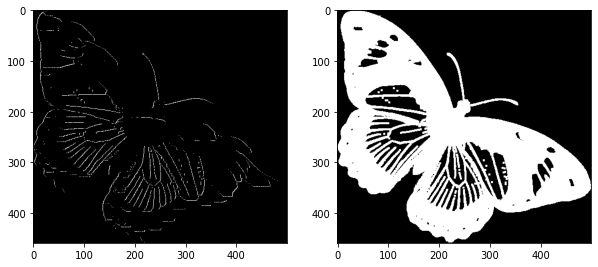

In [31]:
kernel_element = np.array([[0,1,0], [1,1,1], [0,1,0]]).astype('uint8')
skeleton = get_skeleton(coords, img)
show_img(skeleton, img)

Com a extração do esqueleto da imagem, foi possível pegar detalhes estruturais mais finos, não visualizados na extração de bordas.

## Contagem de figuras com PDI
A contagem das figuras foi realizada seguindo os métodos abaixo, iniciando pela leitura da imagem e conversão para escala de cinza.

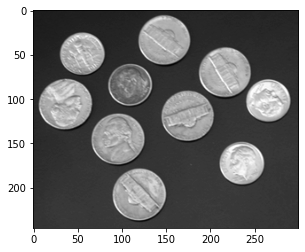

In [117]:
coin_img = cv2.imread('/home/alvaro/Documentos/mestrado/PDI/coins.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(coin_img, cmap='gray')

O próximo passo foi realizar a binarização da imagem, com o método *binarize_img*, escolhendo impiricamente um limiar que destaque bem os objetos em relação ao fundo (se saiu melhor do que utilizar outras abordagens, como o algoritmo Otsu). A imagem resultante foi subtraída para inverter as cores, pois originalmente estava com o objeto de interesse como preto e o fundo branco.

In [118]:
def binarize_img(img, threshold):
    img[img < threshold] = 1
    img[img >= threshold] = 0
    return img

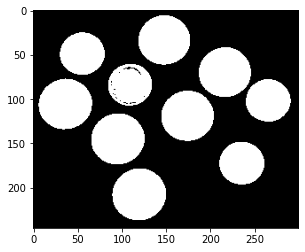

In [119]:
bin_coin = 1 - binarize_img(coin_img.copy(), 100)
coords = map_coordinates(bin_coin)
plt.imshow(bin_coin, cmap='gray')

Como é possível observar, a binarização ainda possui ruídos, devido às diferenças de iluminação da imagem. Por conta disso, foi aplicado um pré-processamento utilizando a dilatação, a fim de deixar as figuras mais uniformes. Outro importante ponto é que o elemento estruturante passou a ter um tamanho de 5x5 ao invés de 11x11, para gerar transformações menos abruptas na imagem.

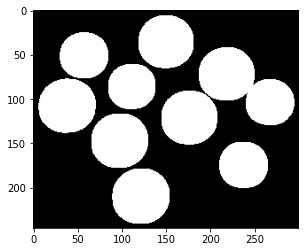

In [120]:
kernel_element = get_kernel(5,5)
final_img = dilate_img(coords, bin_coin)
plt.imshow(final_image, cmap='gray')

A aplicação de dilatação resultou em uma figura bem mais uniforme, porém alguns objetos ficaram espacialmente próximos uns dos outros. Para simplificar ainda mais a detecção, foi realizado uma série de erosões na imagem para diminuir a área das figuras. 

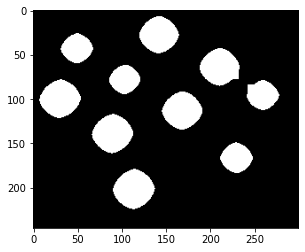

In [121]:
for i in range(4):
    coords = map_coordinates(final_img)
    final_img = erode_img(coords, final_img)

plt.imshow(final_img, cmap='gray')

Com isso, as figuras ficaram mais afastadas no espaço, facilitando o próximo passo de contagem.

Para realizar a contagem de figuras, foi implementado um método que percorre toda a imagem até encontrar uma figura (valor 1). Ao encontrá-la, as bordas da figura são destacadas, considerando uma vizinhança de 8 pixels. Por fim, é feito um preenchimento no perímetro das bordas do objeto de interesse. Esse preenchimento é realizado com valores distintos para cada objeto, sendo asssim, se torna um identificador do mesmo. Ao final do processo, basta contar a quantidade de valores distintos existentes, sendo esse representado pelo número de figuras presentes na imagem.

In [122]:
def is_border(img, l, c):
    # pega os valores na vizinhança 4
    border = [img[l + 1][c], img[l + -1][c],
              img[l][c + 1], img[l][c - 1]]
    # verifica se existe ao menos 1 valor 0 (indicando uma borda)
    if 0 not in border:
        return False
    return True

In [123]:
def pad_perimeter(img, first_line, first_col, last_line, last_col, figure_n):
    for l in range(last_line - first_line):
        for c in range(last_col - first_col):
            # preenche a área da figura (valores 1) com valores únicos para o objeto
            if img[first_line + l][first_col + c] == 1:
                img[first_line + l][first_col + c] = figure_n

In [31]:
def get_figure_perimeter(img, fig_area, figure_n):
    first_line = 9999
    last_line = 0
    first_col = 9999
    last_col = 0
    # delimita um perímetro quadrático na imagem, encontrando os limiares superiores e inferiores
    for i in range(len(fig_area)):
        first_line = fig_area[i][0] if fig_area[i][0] < first_line else first_line
        last_line = fig_area[i][0] if fig_area[i][0] > last_line else last_line
        first_col = fig_area[i][1] if fig_area[i][1] < first_col else first_col
        last_col = fig_area[i][1] if fig_area[i][1] > last_col else last_col
        
    return pad_perimeter(img, first_line, first_col, last_line, last_col, figure_n)

In [32]:
def get_figure_border(img, l, c, figure_n, fig_area):
    # função recursiva para destacar as bordas dos objetos, olhando para uma vizinhança 8.
    
    # adiciona na lista as coordenadas da borda dos objetos
    fig_area.append((l,c))
    if img[l][c+1] == 1 and is_border(img, l, c+1):
        img[l][c+1] = figure_n
        get_figure_border(img, l, c+1, figure_n, fig_area)
    elif img[l][c-1] == 1 and is_border(img, l, c-1):
        img[l][c-1] = figure_n
        get_figure_border(img, l, c-1, figure_n, fig_area)
    elif img[l+1][c] == 1 and is_border(img, l+1, c):
        img[l+1][c] = figure_n
        get_figure_border(img, l+1, c, figure_n, fig_area)
    elif img[l-1][c] == 1 and is_border(img, l-1, c):
        img[l-1][c] = figure_n
        get_figure_border(img, l-1, c, figure_n, fig_area)
    elif img[l+1][c-1] == 1 and is_border(img, l+1, c-1):
        img[l+1][c-1] = figure_n
        get_figure_border(img, l+1, c-1, figure_n, fig_area)
    elif img[l-1][c-1] == 1 and is_border(img, l-1, c-1):
        img[l-1][c-1] = figure_n
        get_figure_border(img, l-1, c-1, figure_n, fig_area)
    elif img[l-1][c+1] == 1 and is_border(img, l-1, c+1):
        img[l-1][c+1] = figure_n
        get_figure_border(img, l-1, c+1, figure_n, fig_area)
    elif img[l+1][c+1] == 1 and is_border(img, l+1, c+1):
        img[l+1][c+1] = figure_n
        get_figure_border(img, l+1, c+1, figure_n, fig_area)

    return get_figure_perimeter(img, fig_area, figure_n)

In [76]:
def count_n_figures(final_img):
    figures = 10
    for l in range(final_img.shape[0]):
        for c in range(final_img.shape[1]):
            # percorre a imagem até encontrar um objeto (pixel com valor 1)
            if final_img[l][c] == 1:
                figures+= 10
                final_img[l][c] = figures
                get_figure_border(final_img, l, c, figures, [])

    unique_values = np.unique(final_img)
    print('Essa imagem possui {} figuras'.format(len(unique_values) - 1))
    return final_img

Essa imagem possui 10 figuras


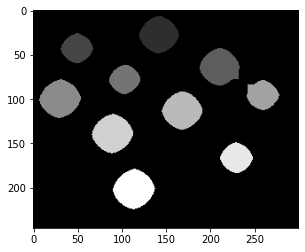

In [129]:
final_img = count_n_figures(final_img)
plt.imshow(final_img, cmap='gray')
plt.show()

Podemos verificar que o algoritmo conseguiu contar com sucesso a número de figuras na imagem, distinguindo cada um deles por um valor de intensidade (nível de branco) diferente. 

Existem inúmeras outras formas de se realizar esse trabalho de contagem de figuras, como por exemplo, utilizando os métodos prontos da biblioteca OpenCV, fazendo a contagem de componentes conexos.

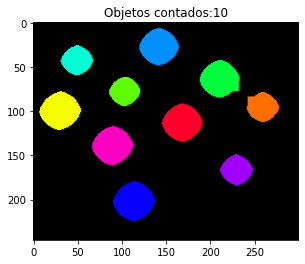

In [127]:
ret, labels = cv2.connectedComponents(final_img.astype('uint8')) # conta os componentes conexos
label_hue = np.uint8(179 * labels / np.max(labels)) # gera valores únicos para os objetos 
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR) # adiciona as cores
labeled_img[label_hue == 0] = 0

plt.title('Objetos contados:'+ str(ret-1))
plt.imshow(labeled_img)
plt.show()

Os resultados obtidos pelo OpenCV são exatamente os mesmos!


A próxima imagem é um pouco mais desafiadora, possuindo moedas com tamanhos bastante distintos, variação de cores e intensidade e também proximidade espacial. O primeiro passo foi ler e converter a imagem para escala de cinza.

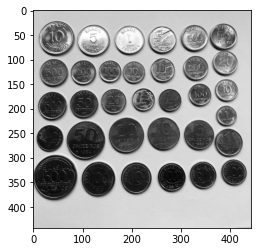

In [130]:
coin_img = cv2.imread('/home/alvaro/Documentos/mestrado/PDI/coins 2.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(coin_img, cmap='gray')

Dois pontos de atenção nessa imagem são as diferenças de intensidade entre as moedas da parte superior, ficando parecidas com a cor do background, bem como os detalhes inerente a elas, sendo um fator de geração de ruído na binarização. Para atenuar esses problemas, foi aplicado uma correção de cor, bem como um filtro de média para redução dos detalhes da figura.

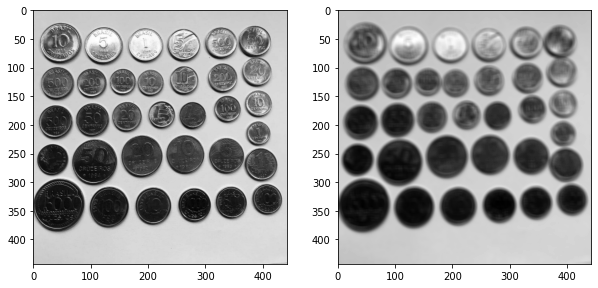

In [131]:
gray_correct = np.array(255 * (coin_img / 255) ** 1.3 , dtype='uint8') # diminuição do brilho da imagem
image_blur = cv2.blur(gray_correct,(7,7)) # filtragem espacial por média
show_img(coin_img, image_blur)

Com isso, foi possível corrigir diminuir a diferença de brilho e os detalhes na imagem original. Uma deteção de bordas foi realizada com ajuda do operador de sobel, para facilitar o processo de binarização.

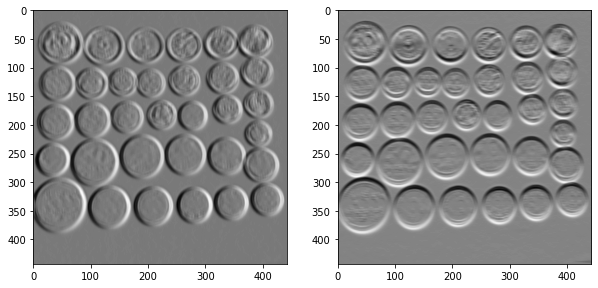

In [134]:
sobelx = cv2.Sobel(image_blur,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(image_blur,cv2.CV_64F,0,1,ksize=3)
show_img(sobelx, sobely)

Destaca-se o operador vertical (y), pois gera uma atenuaçao ainda maior dos detalhes dentro das moedas. Com isso, é possível realizar a binarização de maneira mais eficiente.

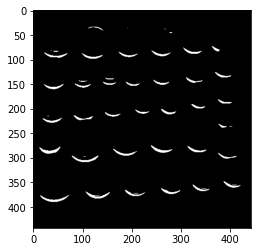

In [155]:
bin_coin = 1 - binarize_img(sobely.copy(), 120)
plt.imshow(bin_coin, cmap='gray')

A imagem binarizada destacou a parte de maior contraste na imagem resultante do filtro de sobel, que são as bordas inferiores. Ainda é possível observar alguns ruídos remanescentes, portanto, foi aplicado uma operação de abertura seguido de dilatações, para deixar os componentes claramente distinguidos na imagem e sem ruídos.

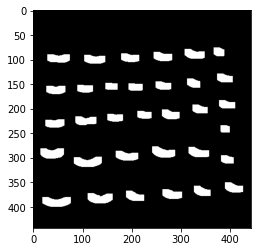

In [157]:
kernel_element = get_kernel(3,3)
coords = map_coordinates(bin_coin)
result_img = openning_img(coords, bin_coin)

for i in range(5):
    coords = map_coordinates(result_img)
    result_img = dilate_img(coords, result_img)

plt.imshow(result_img, cmap='gray')

Essa imagem possui 33 figuras


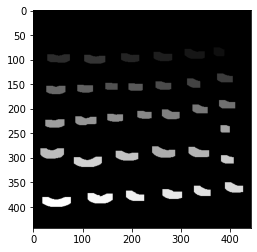

In [158]:
final_img = count_n_figures(result_img)
plt.imshow(final_img, cmap='gray')
plt.show()

O método de contagem desenvolvido obteve sucesso mais uma vez, destacando todas as 33 moedas presentes na imagem. Uma desvantagem óbvia de métodos manuais de pré processamento para contagem de figuras é a necessidade de aplicação de esforço humano para cada nova imagem, por isso, métodos com inteligência artificial também se destacam nessa área.